In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocessing

In [9]:

import pickle

# Paths
data_path = r"C:\Users\Shiva Kapoor\Downloads\chord_recognition1\Guitar_Only"
#chords = ['Am', 'Bb', 'Bdim', 'C', 'Dm', 'Em', 'F', 'G']
chords = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g']

# Function to extract HPCP features
def extract_hpcp(file_path, sr=22050):
    y, sr = librosa.load(file_path, sr=sr)
    n_fft = min(512, len(y))
    hpcp = librosa.feature.chroma_stft(y=y, sr=sr)
                                         
    return np.mean(hpcp, axis=1)

# Preprocess dataset
data = []
labels = []

for chord in chords:
    chord_path = os.path.join(data_path, r'C:\Users\Shiva Kapoor\Downloads\chord_recognition1\Guitar_Only', chord)
    for file in os.listdir(chord_path):
        if file.endswith('.wav'):
            file_path = os.path.join(chord_path, file)
            features = extract_hpcp(file_path)
            data.append(features)
            labels.append(chord)

data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

# Save label encoder for later use
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)  

# Model Building

In [10]:
import pickle
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM model
model = SVC(kernel='linear', C=100, probability=True)
model.fit(X_train, y_train)

# Save the trained model
with open('chord_svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Classification report
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)


Accuracy: 0.97
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.94      0.98      0.96        47
           2       0.96      1.00      0.98        46
           3       1.00      1.00      1.00        36
           4       0.97      1.00      0.99        34
           5       0.97      0.94      0.96        34
           6       0.97      1.00      0.99        33
           7       1.00      0.91      0.95        44
           8       0.98      0.96      0.97        48
           9       0.98      0.98      0.98        42

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# Grid Search

In [7]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [8]:
parameters = {'kernel': ['linear', 'rbf'], 'C':[0.1,1,10,100]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']})

In [9]:
y_pred1 = clf.predict(X_test)

In [10]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [12]:
report = classification_report(y_test, y_pred1)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1:.2f}")
print(report)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.94      1.00      0.97        47
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        36
           4       0.94      1.00      0.97        34
           5       1.00      0.94      0.97        34
           6       1.00      1.00      1.00        33
           7       0.98      1.00      0.99        44
           8       1.00      0.96      0.98        48
           9       1.00      0.98      0.99        42

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.98      0.99       400



# Prediction on Actual Songs

Detected BPM: 123.05
[ 0.11609977  0.65015873  1.13777778  1.60217687  2.08979592  2.55419501
  3.0185941   3.4829932   3.97061224  4.45823129  4.94585034  5.41024943
  5.89786848  6.38548753  6.87310658  7.33750567  7.82512472  8.31274376
  8.80036281  9.2647619   9.75238095 10.24       10.72761905 11.2152381
 11.67963719 12.14403628 12.63165533 13.09605442 13.58367347 14.04807256
 14.53569161 15.0000907 ]


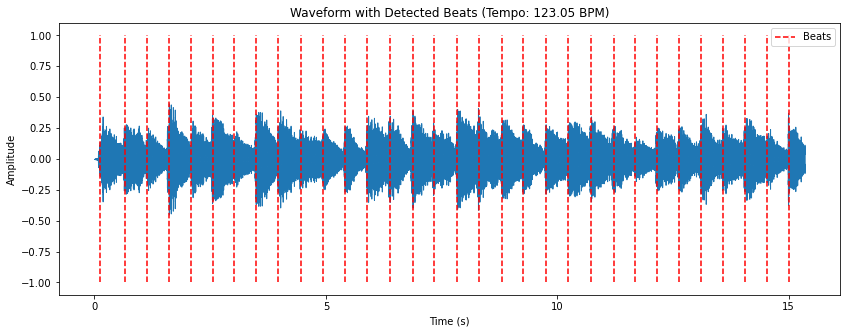

Predicted chords: ['em', 'g', 'g', 'g', 'em', 'bm', 'g', 'em', 'em', 'g', 'g', 'em', 'g', 'g', 'g', 'em', 'g', 'g', 'g', 'em', 'g', 'g', 'g', 'em', 'em', 'g', 'g', 'em', 'g']


In [8]:
import numpy as np
import librosa
import pickle
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

def predict_chords(audio_file, model, label_encoder, sr=22050, threshold=0.5):
    # Load audio
    y, sr = librosa.load(audio_file, sr=sr)
    
    # Calculate tempo (BPM) and beat frames
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    
    # Convert beat frames to time (in seconds)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    
    # Print the detected BPM
    print(f"Detected BPM: {tempo[0]:.2f}")
    print(beat_times)
    
    chords_pred = []
    
    # Loop through the audio segments based on detected beat times
    for i in range(len(beat_times) - 1):
        start = beat_times[i]
        end = beat_times[i + 1]
        
        # Convert start and end times to frame indices
        start_frame = int(start * sr)
        end_frame = int(end * sr)
        
        segment = y[start_frame:end_frame]

        # Extract features
        chroma = librosa.feature.chroma_stft(y=segment, sr=sr)
        features = np.mean(chroma, axis=1).reshape(1, -1)
        
        # Get prediction probabilities
        probas = model.predict_proba(features)[0]
        
        # Get all chords with probability above the threshold
        for idx, proba in enumerate(probas):
            if proba > threshold:
                chord = label_encoder.inverse_transform([idx])[0]
                chords_pred.append(chord)
    
    # Plot the waveform and beats
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.vlines(beat_times, -1, 1, color='r', linestyle='--', label='Beats')
    plt.title(f'Waveform with Detected Beats (Tempo: {tempo[0]:.2f} BPM)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    return chords_pred

# Load the model and label encoder
with open('chord_svm_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Predict chords
audio_file = r"C:\Users\Shiva Kapoor\Downloads\Test_about a girl.wav"
predicted_chords = predict_chords(audio_file, model, label_encoder)

print(f'Predicted chords: {predicted_chords}')


Detected BPM: 123.05


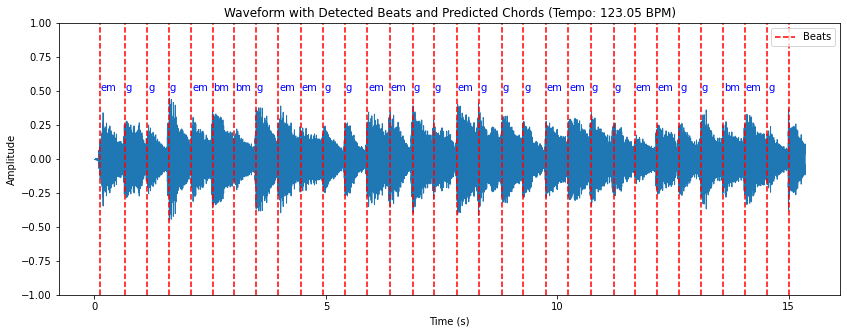

Predicted chords: ['em', 'g', 'g', 'g', 'em', 'bm', 'bm', 'g', 'em', 'em', 'g', 'g', 'em', 'em', 'g', 'g', 'em', 'g', 'g', 'g', 'em', 'em', 'g', 'g', 'em', 'em', 'g', 'g', 'bm', 'em', 'g']


In [12]:
import numpy as np
import librosa
import pickle
import warnings
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings('ignore')

def predict_chords(audio_file, model, label_encoder, sr=22050, threshold=0.3):
    # Load audio
    y, sr = librosa.load(audio_file, sr=sr)
    
    # Calculate tempo (BPM) and beat frames
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    
    # Convert beat frames to time (in seconds)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    
    # Print the detected BPM
    print(f"Detected BPM: {tempo[0]:.2f}")
    
    chords_pred = []
    
    # Loop through the audio segments based on detected beat times
    for i in range(len(beat_times) - 1):
        start = beat_times[i]
        end = beat_times[i + 1]
        
        # Convert start and end times to frame indices
        start_frame = int(start * sr)
        end_frame = int(end * sr)
        
        segment = y[start_frame:end_frame]

        # Extract features
        chroma = librosa.feature.chroma_stft(y=segment, sr=sr)
        features = np.mean(chroma, axis=1).reshape(1, -1)
        
        # Get prediction probabilities
        probas = model.predict_proba(features)[0]
        
        # Get all chords with probability above the threshold
        chord_list = []
        for idx, proba in enumerate(probas):
            if proba > threshold:
                chord = label_encoder.inverse_transform([idx])[0]
                chord_list.append(chord)
        
        # Append the most probable chord (if any)
        if chord_list:
            chords_pred.append(chord_list[0])  # Choose the first chord if multiple are found
        else:
            chords_pred.append("Rest")  # Mark as "Rest" if no chord is predicted
    
    # Plot the waveform and beats
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.vlines(beat_times, -1, 1, color='r', linestyle='--', label='Beats')

    # Annotate the chords on the graph
    for i in range(len(beat_times) - 1):
        plt.text(beat_times[i] + 0.02, 0.5, chords_pred[i], 
                 horizontalalignment='left', fontsize=10, color='blue')
    
    plt.title(f'Waveform with Detected Beats and Predicted Chords (Tempo: {tempo[0]:.2f} BPM)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.ylim([-1, 1])  # Set y-limits for better visibility
    plt.show()

    return chords_pred

# Load the model and label encoder
with open('chord_svm_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Predict chords
audio_file = r"C:\Users\Shiva Kapoor\Downloads\Test_about a girl.wav"
predicted_chords = predict_chords(audio_file, model, label_encoder)

print(f'Predicted chords: {predicted_chords}')


In [14]:
import numpy as np
import librosa
import pickle
import warnings

warnings.filterwarnings('ignore')

def predict_chords(audio_file, model, label_encoder, sr=22050, threshold=0.5):
    # Load audio
    y, sr = librosa.load(audio_file, sr=sr)
    
    # Calculate tempo (BPM) and beat frames
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    
    # Convert beat frames to time (in seconds)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    
    # Print the detected BPM
    print(f"Detected BPM: {tempo[0]:.2f}")
    
    chords_pred = []
    
    # Loop through the audio segments based on detected beat times
    for i in range(len(beat_times) - 1):
        start = beat_times[i]
        end = beat_times[i + 1]
        
        # Convert start and end times to frame indices
        start_frame = int(start * sr)
        end_frame = int(end * sr)
        
        segment = y[start_frame:end_frame]

        # Extract features
        chroma = librosa.feature.chroma_stft(y=segment, sr=sr)
        features = np.mean(chroma, axis=1).reshape(1, -1)
        
        # Get prediction probabilities
        probas = model.predict_proba(features)[0]
        
        # Get all chords with probability above the threshold
        for idx, proba in enumerate(probas):
            if proba > threshold:
                chord = label_encoder.inverse_transform([idx])[0]
                chords_pred.append(chord)
    
    return chords_pred

# Load the model and label encoder
with open('chord_svm_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Predict chords
audio_file = '/kaggle/input/mp3test/Test_about a girl.mp3'
predicted_chords = predict_chords(audio_file, model, label_encoder)

print(f'Predicted chords: {predicted_chords}')


Detected BPM: 123.05
Predicted chords: ['em', 'g', 'g', 'g', 'em', 'bm', 'g', 'em', 'em', 'g', 'g', 'em', 'g', 'g', 'g', 'g', 'g', 'g', 'em', 'g', 'g', 'g', 'em', 'em', 'g', 'g', 'em', 'g']


Detected Tempo: 123.05 BPM
Beat times (in seconds): [ 0.11609977  0.65015873  1.13777778  1.60217687  2.08979592  2.55419501
  3.0185941   3.4829932   3.97061224  4.45823129  4.94585034  5.41024943
  5.89786848  6.38548753  6.87310658  7.33750567  7.82512472  8.31274376
  8.80036281  9.2647619   9.75238095 10.24       10.72761905 11.2152381
 11.67963719 12.14403628 12.63165533 13.09605442 13.58367347 14.04807256
 14.53569161 15.0000907 ]


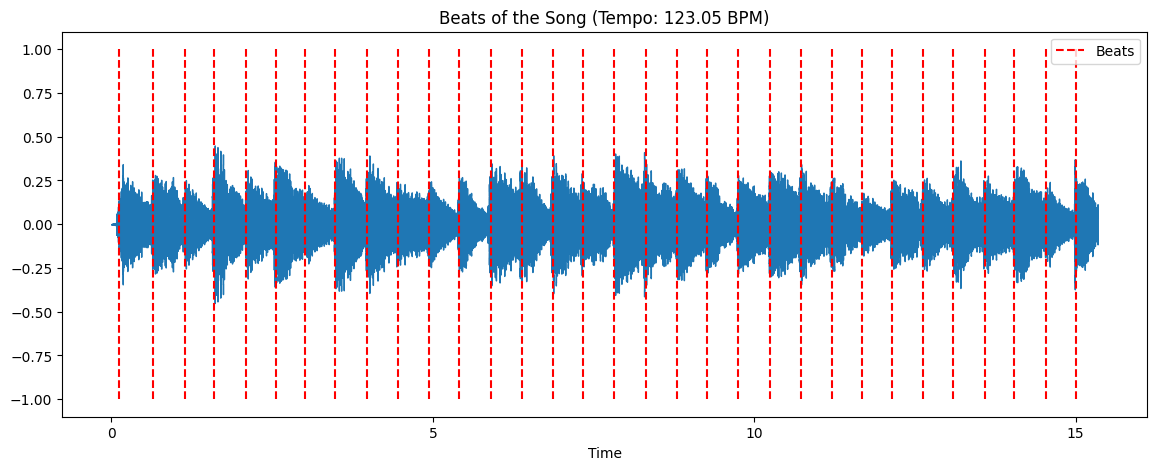

In [15]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '/kaggle/input/test-song/Test_about a girl.wav'
y, sr = librosa.load(audio_file, sr=22050)

# Get the tempo (in BPM) and beat frames
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Convert beat frames to time
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Print the detected tempo and beat times
print(f"Detected Tempo: {tempo[0]:.2f} BPM")
print("Beat times (in seconds):", beat_times)

# Optionally, display the waveform and beats
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.vlines(beat_times, -1, 1, color='r', linestyle='--', label='Beats')
plt.title(f'Beats of the Song (Tempo: {tempo[0]:.2f} BPM)')
plt.legend()
plt.show()


In [ ]:
segment_length = 60.0 / tempo[0]
segment_length

In [ ]:
unique_progression = []
for i in predicted_chords:
    if len(unique_progression) == 0:
        unique_progression.append(i)
    else:
        if unique_progression[-1] == str(i):
            continue
        else:
            unique_progression.append(i)
            
print(unique_progression)

In [ ]:
import matplotlib.pyplot as plt
# # Visualization of a single audio file for example
# #example_file = os.path.join(base_dir, '/kaggle/input/guitar-chords-v3/Training', '/kaggle/input/guitar-chords-v3/Training/Bb', 'Bb_AcusticPlug12_4.wav')  # Replace with an actual example file path
# example_file = os.path.join('/kaggle/input/test111', '/kaggle/input/test111/coniferous-forest-142569.wav')  # Replace with an actual example file path

# Load the example audio file
# y, sr = librosa.load(example_file, sr=44100, mono=True)

# Normalize the audio signal
y = y / np.max(np.abs(y))

# Extract features
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot waveform
plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Plot MFCCs
plt.subplot(3, 1, 3)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')

plt.tight_layout()
plt.show()

# Plot Chroma features
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Features')
plt.tight_layout()
plt.show()


# Space removal in betn and at the end

In [ ]:
import librosa

In [ ]:
y, sr = librosa.load('/kaggle/input/guitar-chords-v3/Test/C/C_AcusticPlug28_2.wav')

In [ ]:
librosa.display.waveshow(y, sr=sr)

In [ ]:
def space_removal(y):
    y = list(y)
    for i,j in enumerate(y):
        j=int(j)
        if abs(j) >= 0.2:
            y1 = [k for k in y[:i] if abs(k) >= 0.01] + y[i:]
            break
    for i,j in enumerate(y1[::-1]):
        if abs(j) >= 0.2:
            y2 = [k for k in y1[::-1][:i] if abs(k) >= 0.01] + y1[::-1][i:]
            break
    return np.array(y2[::-1])

In [ ]:
y_new = space_removal(y)
librosa.display.waveshow(y_new, sr=sr)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y, sr = librosa.load('/kaggle/input/mp3test/Test_about a girl.mp3')

# Normalize the audio signal
y = y / np.max(np.abs(y))

# Extract features
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot waveform
plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.tight_layout()
plt.show()

# Plot Chroma features
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Features')
plt.tight_layout()
plt.show()